In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

In [39]:
fits_file = "https://mast.stsci.edu/api/v0.1/Download/file?uri=mast:Kepler/url/missions/kepler/lightcurves/0119/011960862//kplr011960862-2013131215648_llc.fits"
fits.info(fits_file)

Filename: C:\Users\Bartek Skica\.astropy\cache\download\url\1b57ea8995438c00e4d54c8f55ecd19e\contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      58   ()      
  1  LIGHTCURVE    1 BinTableHDU    155   1556R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        48   (5, 4)   int32   


In [40]:
fits.getdata(fits_file, ext=1).columns

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2454833'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E13.6'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'SAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_QUALITY'; format = 'J'; disp = 'B16.16'
    name = 'PSF_CENTR1'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR1_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'PSF_CENTR2'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR2_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'MOM_CENTR1'; format = 'D'; uni

In [41]:
with fits.open(fits_file, mode="readonly") as hdulist:    
    k2_bjds = hdulist[1].data['TIME']
    sap_fluxes = hdulist[1].data['SAP_FLUX']
    pdcsap_fluxes = hdulist[1].data['PDCSAP_FLUX']

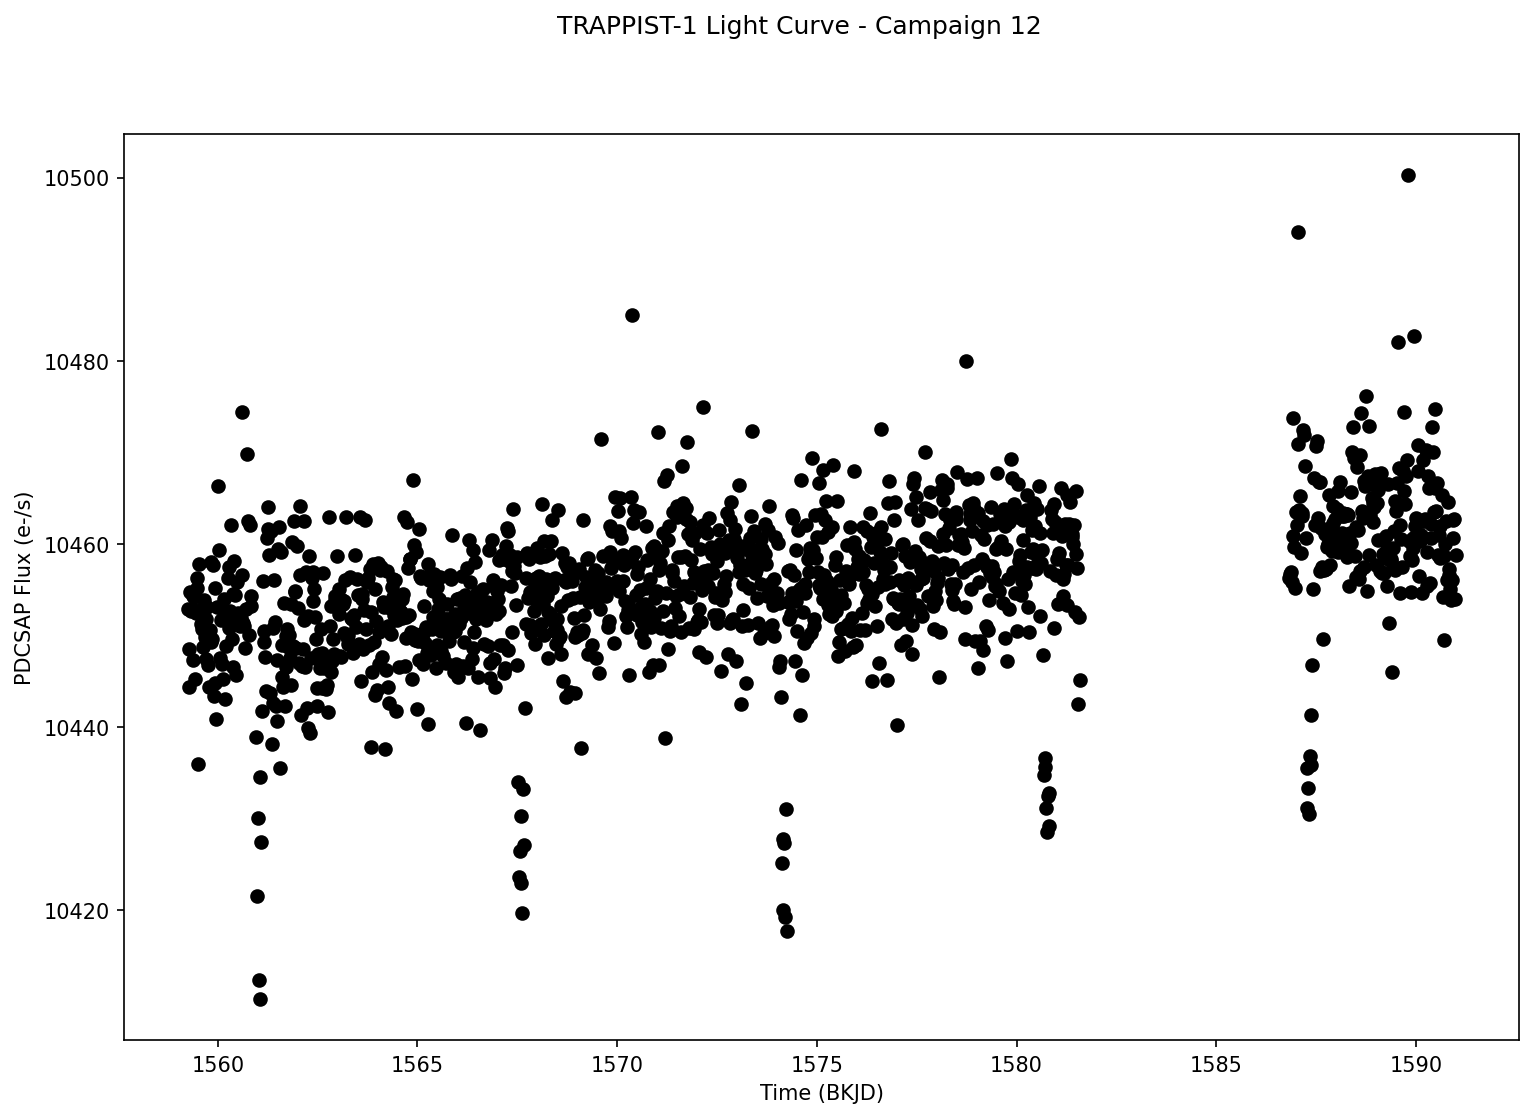

In [42]:

# Start figure and axis.
fig, ax = plt.subplots()
fig.set_size_inches(12., 8.)

# Plot the timeseries in black circles.
ax.plot(k2_bjds, pdcsap_fluxes, 'ko')

# Let's label the axes and define a title for the figure.
fig.suptitle("TRAPPIST-1 Light Curve - Campaign 12")
ax.set_ylabel("PDCSAP Flux (e-/s)")
ax.set_xlabel("Time (BKJD)")

# Let's zoom in on the x-axis and y-axis.  We can see a sinusoidal pattern due to starspots.
# The transits are in there too, but you'd need to clean the light curve before you see them.
#ax.set_xlim(2920., 2950.)
#ax.set_ylim(0.1e7, 0.2e7)

# Adjust the left margin so the y-axis label shows up.
#plt.subplots_adjust(left=0.15)
plt.show()

In [29]:
with fits.open(fits_file, mode="readonly") as hdulist:
    qual_flags = hdulist[1].data['SAP_QUALITY']

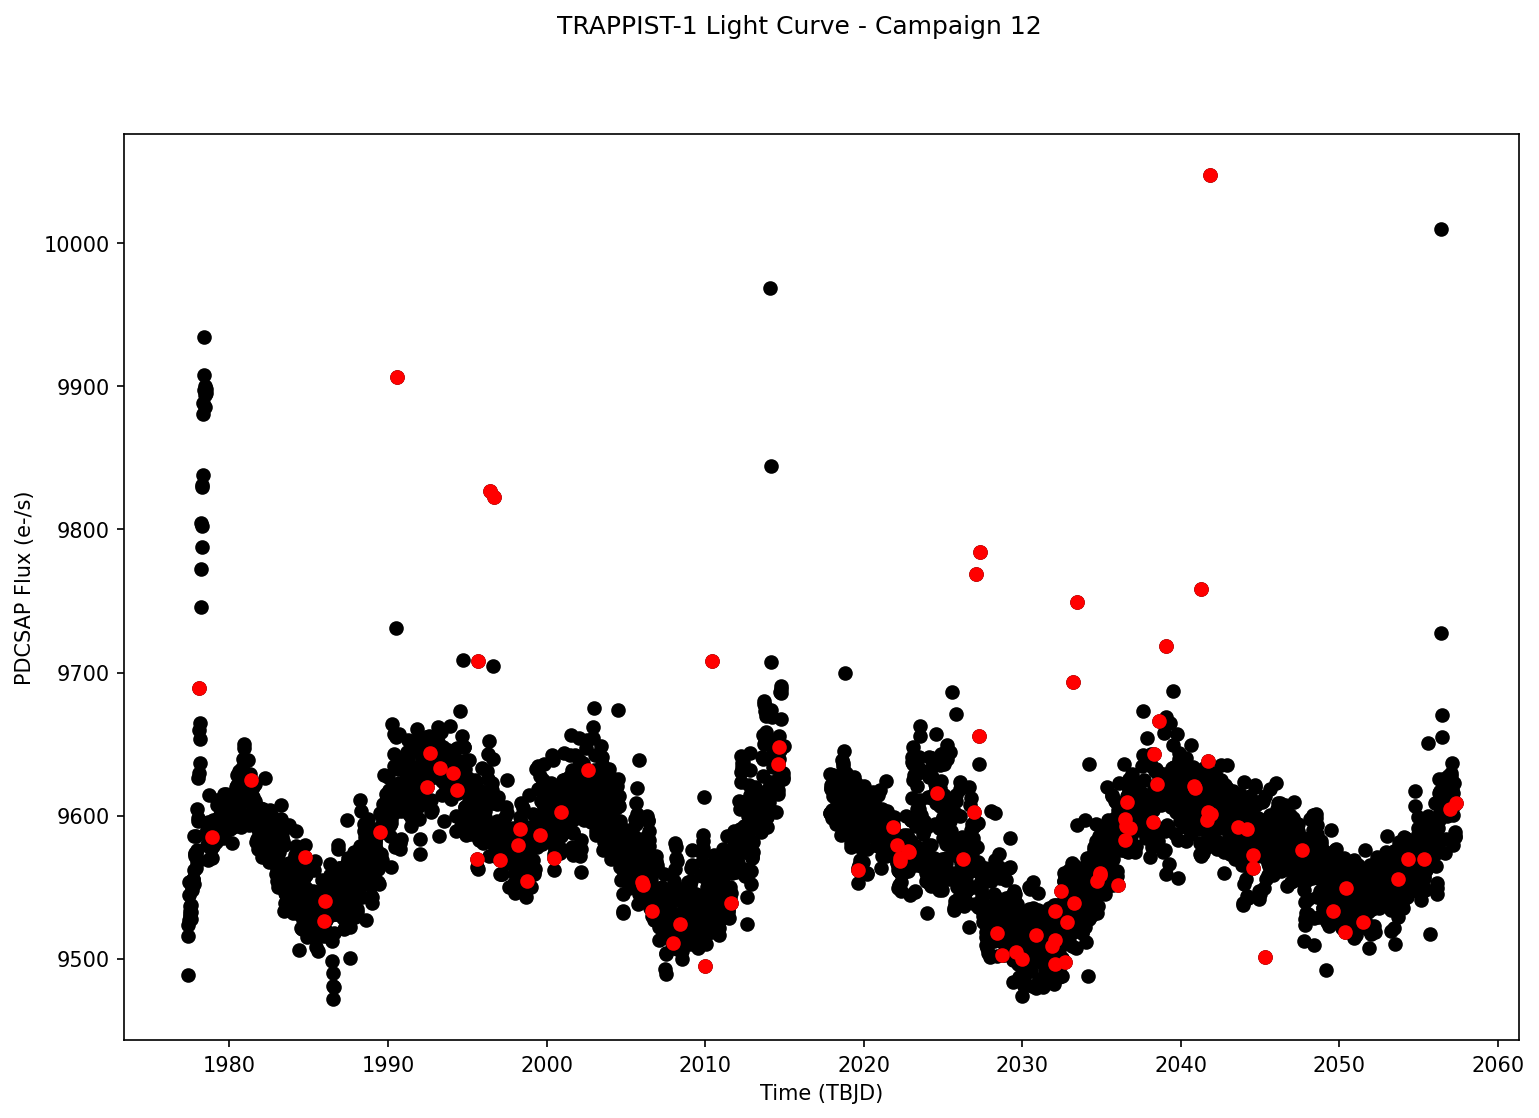

In [10]:
# Start figure and axis.
fig, ax = plt.subplots()
fig.set_size_inches(12., 8.)

# Plot the timeseries in black circles.
ax.plot(k2_bjds, pdcsap_fluxes, 'ko')

# Locate quality flags greater than zero.
where_gt0 = np.where(qual_flags > 0)[0]

# Overplot the fluxes with quality flags greater than zero in red.
ax.plot(k2_bjds[where_gt0], pdcsap_fluxes[where_gt0], 'ro')

# Let's zoom in on the x-axis and y-axis.
#ax.set_xlim(2920., 2950.)
#ax.set_ylim(0.1e7, 0.2e7)

# Let's label the axes and define a title for the figure.
fig.suptitle("TRAPPIST-1 Light Curve - Campaign 12")
ax.set_ylabel("PDCSAP Flux (e-/s)")
ax.set_xlabel("Time (TBJD)")
plt.show()

In [24]:
print(len(pdcsap_fluxes))

1556
